In [1]:
from catinous.dataset import BatchDataset, ContinuousDataset
from catinous.dynamicmemory.DynamicMemoryModel import DynamicMemoryModel 
import catinous.dynamicmemory.DynamicMemoryModel as dmodel
import catinous.utils as cutils
import os
import pandas as pd
from py_jotools import mut, slurm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import catinous.evalfunctions as evalfu

In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/m

In [2]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '240'}


hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Siemens',
     'noncontinuous_steps': 500,
    'noncontinuous_train_splits': ['base','train'],
    'use_memory': False
}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch49616
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch49616.job
Submitted batch job 3204031



In [19]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '240'}
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Siemens',
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base'],
    'use_memory': False
}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch44621
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch44621.job
Submitted batch job 3213694



In [14]:
sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplit.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Canon',
     'noncontinuous_steps': 500,
    'noncontinuous_train_splits': ['base','train'],
    'use_memory': False
}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch78098
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch78098.job
Submitted batch job 3204189



In [4]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 16,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', # cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'pseudodomain_detection': True
        }

seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
    hparams['seed'] = seeds[i]
    hparams['run_postfix'] = i+1
    print(dmodel.cached_path(hparams), dmodel.is_cached(hparams))
    if schedule:
        slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
    else:
        model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)
    

/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_2_663d121011.pt False
cardiac_cont69294
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont69294.job
Submitted batch job 3214592

/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_3_cea87b528d.pt False
cardiac_cont28436
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont28436.job
Submitted batch job 3214593

/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_4_33688665fd.pt False
cardiac_cont72332
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont72332.job
Submitted batch job 3214594

/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_5_b08dca2c09.pt False
cardiac_cont147

In [4]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 16,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
         #'force_misclassified': True,
         #'misclass_threshold': 0.8,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', #'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True
        }


seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
        hparams['seed'] = seeds[i]
        hparams['run_postfix'] = i+1
        if schedule:
            slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
        else:
            model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)
        break

cardiac_cont95008
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont95008.job
Submitted batch job 3214561



In [9]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 16,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':False,
         'random_memory': True,
         'balance_memory': False,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt',#'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130
        }


seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
        hparams['seed'] = seeds[i]
        hparams['run_postfix'] = i+1
        #print(dmodel.cached_path(hparams), dmodel.is_cached(hparams))
        if schedule:
            slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
        else:
            model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_cont84717
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont84717.job
Submitted batch job 3215894

cardiac_cont82087
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont82087.job
Submitted batch job 3215895

cardiac_cont80435
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont80435.job
Submitted batch job 3215896

cardiac_cont23664
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont23664.job
Submitted batch job 3215897

cardiac_cont18053
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont18053.job
Submitted batch job 3215898



In [3]:
ds = ContinuousDataset.CardiacContinuous('/project/catinous/cardiacslicessplit.csv', order=['Siemens', 'GE', 'Philips', 'Canon'], seed=1654130)

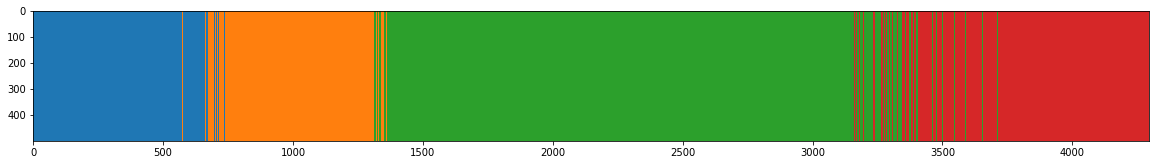

In [4]:
newcmp = ListedColormap([sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3]], name='OrangeBlue')
res = ds.df.scanner == 'Siemens'
res1 = ds.df.scanner == 'GE'
res2 = ds.df.scanner == 'Philips'
res3 = ds.df.scanner == 'Canon'
res[res1] = 2
res[res2] = 3
res[res3] = 4
plt.figure(figsize=(20,20))
plt.imshow(np.tile(res,(500,1)), cmap=newcmp)

In [5]:
sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'eval_cardiac',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 2}


hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 16,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
         #'force_misclassified': True,
         #'misclass_threshold': 0.8,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', #'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True
        }

#hparams['force_misclassified'] = True
#hparams['misclass_threshold'] = 0.80

hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i, seed in enumerate(seeds):
        hparams['seed']= seed
        hparams['run_postfix'] = i+1

        outputfile = f'/project/catinous/results/cardiac/{cutils.get_expname(hparams)}_dicescores.csv'

        #print(outputfile)
        slurm.srun(evalfu.eval_cardiac, [hparams, outputfile], params=sparams, remote=True)
        #evalfu.eval_cardiac(hparams, outputfile)

eval_cardiac48817
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac48817.job
Submitted batch job 3215868

eval_cardiac10993
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac10993.job
Submitted batch job 3215869

eval_cardiac84277
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac84277.job
Submitted batch job 3215870

eval_cardiac58148
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac58148.job
Submitted batch job 3215871

eval_cardiac80315
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac80315.job
Submitted batch job 3215872



In [3]:
hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 16,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
         #'force_misclassified': True,
         #'misclass_threshold': 0.8,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', #'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True
        }

dmodel.cached_path(hparams)

'/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_1_5f7a07df57.pt'

In [ ]:
{'root_dir': '/project/catinous/', 'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv', 'batch_size': 16, 'training_batch_size': 16, 'transition_phase_after': 0.8, 'memorymaximum': 128, 'use_memory': False, 'random_memory': True, 'balance_memory': False, 'order': ['Siemens', 'GE', 'Philips', 'Canon'], 'continuous': True, 'noncontinuous_steps': 3000, 'noncontinuous_train_splits': ['train', 'base_train'], 'val_check_interval': 10, 'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', 'run_postfix': 1, 'dim': 2, 'task': 'cardiac', 'model': 'fcn', 'seed': 1654130}

In [3]:
hparams

{'root_dir': '/project/catinous/',
 'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
 'batch_size': 16,
 'training_batch_size': 16,
 'transition_phase_after': 0.8,
 'memorymaximum': 128,
 'use_memory': False,
 'random_memory': True,
 'balance_memory': False,
 'order': ['Siemens', 'GE', 'Philips', 'Canon'],
 'continuous': True,
 'noncontinuous_steps': 3000,
 'noncontinuous_train_splits': ['train', 'base_train'],
 'val_check_interval': 10,
 'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt',
 'run_postfix': 1,
 'dim': 2,
 'task': 'cardiac',
 'model': 'fcn',
 'seed': 1654130}

In [20]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Siemens',
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base'],
    'use_memory': False
}
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)


outputfile = f'/project/catinous/results/cardiac/{cutils.get_expname(hparams)}_dicescores.csv'

evalfu.eval_cardiac(hparams, outputfile)

/project/catinous/trained_models/cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt
Read: /project/catinous/trained_models/cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt


In [12]:
hparams

{'continuous': False,
 'root_dir': '/project/catinous/',
 'datasetfile': '/project/catinous/cardiacslicessplit.csv',
 'batch_size': 16,
 'training_batch_size': 16,
 'task': 'cardiac',
 'model': 'fcn',
 'scanner': 'Siemens',
 'noncontinuous_steps': 500,
 'noncontinuous_train_splits': ['base'],
 'use_memory': False,
 'transition_phase_after': 0.7,
 'cachemaximum': 128,
 'random_memory': True,
 'balance_memory': False,
 'order': ['lr', 'hr', 'hr_ts'],
 'val_check_interval': 100,
 'base_model': None,
 'run_postfix': 1}

In [5]:
cutils.get_expname(hparams)

'cardiac_batch_cardiacslicessplit_base_1_199f06e106'

In [10]:
df = pd.read_csv('/project/catinous/cardiacslicessplitsingle.csv')

In [12]:
df.groupby(['scanner', 'split']).count()

filepath     t  slice  slicepath
scanner split                                  
Canon   test        252   252    252        252
        train       758   758    758        758
        val         258   258    258        258
GE      test        246   246    246        246
        train       720   720    720        720
        val         248   248    248        248
Philips test        216   216    216        216
        train      2206  2206   2206       2206
        val         220   220    220        220
Siemens base       1120  1120   1120       1120
        test        228   228    228        228
        train       614   614    614        614
        val         234   234    234        234